In [45]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [46]:
x_train = np.array([0.09291784, 0.46809093, 0.93089486, 0.67612654, 0.73441752,
                    0.86847339, 0.49873225, 0.51083168, 0.18343972, 0.99380898,
                    0.27840809, 0.38028817, 0.12055708, 0.56715537, 0.92005746,
                    0.77072270, 0.85278176, 0.05315950, 0.87168699, 0.58858043])

y_train = np.array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

beta_0 = np.array([0.3, -1.0, -0.5])
omega_0 = np.array([-1.0, 1.8, 0.65])
beta_1 = 2.6
omega_1 = np.array([-24.0, -8.0, 50.0])


In [47]:
def relu(x):
    """Fonction d'activation ReLU"""
    return np.maximum(0, x)

def sigmoid(x):
    """Fonction d'activation Sigmoid"""
    return 1 / (1 + np.exp(-x))

In [48]:
def compute_hidden_layer(x):
    z = beta_0 + omega_0 * x  
    return relu(z)

def compute_network_output(x, beta1_val):
    h = compute_hidden_layer(x)  
    return beta1_val + np.dot(omega_1, h)

def compute_probability(x, beta1_val):
    f_x = compute_network_output(x, beta1_val)
    return sigmoid(f_x)

In [49]:
def compute_likelihood(x_data, y_data, beta1_val):
    likelihood = 1.0
    epsilon = 1e-15
    
    for xi, yi in zip(x_data, y_data):
        p_i = compute_probability(xi, beta1_val)
        p_i = np.clip(p_i, epsilon, 1 - epsilon)
        likelihood *= (p_i ** yi) * ((1 - p_i) ** (1 - yi))
    
    return likelihood

def compute_negative_log_likelihood(x_data, y_data, beta1_val):

    nll = 0.0
    epsilon = 1e-15
    
    for xi, yi in zip(x_data, y_data):
        p_i = compute_probability(xi, beta1_val)
        p_i = np.clip(p_i, epsilon, 1 - epsilon)
        nll -= yi * np.log(p_i) + (1 - yi) * np.log(1 - p_i)
    
    return nll

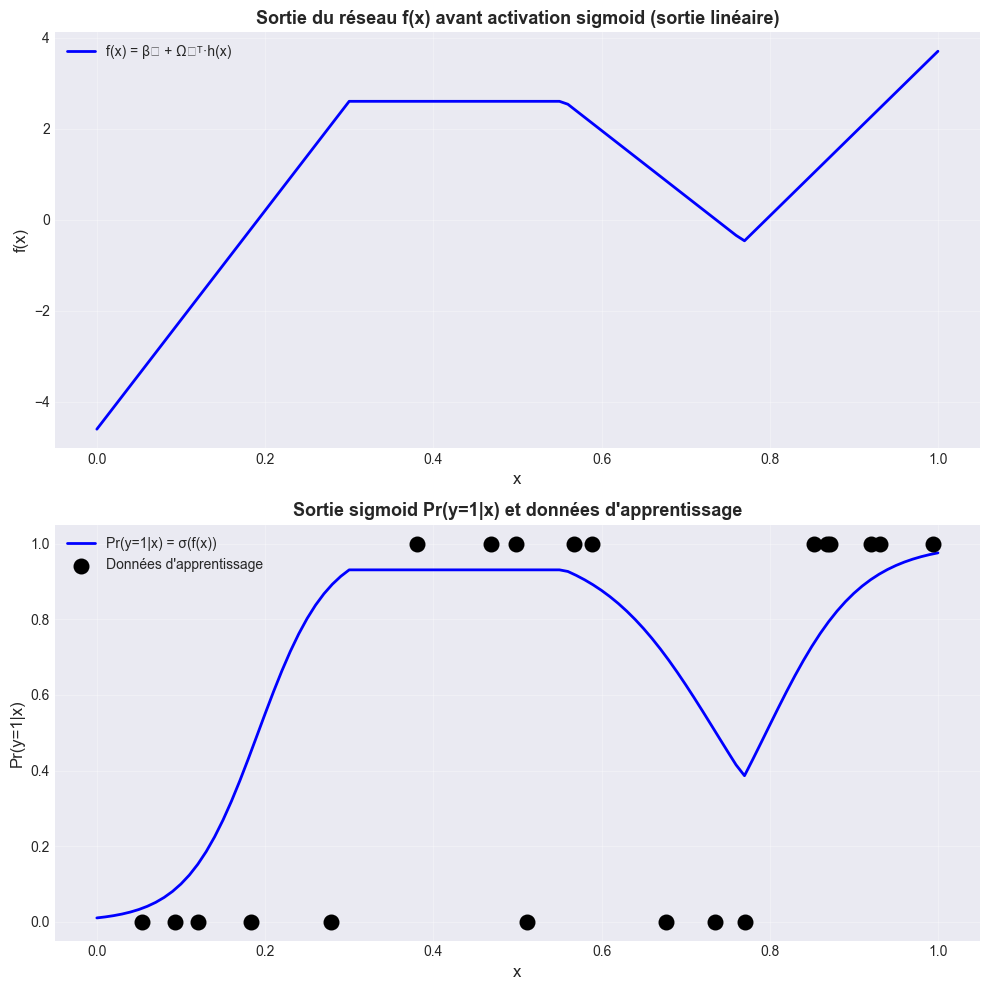


Pour β₁ = 2.6 (les autres paramètres sont fixés)
Plage de f(x): [-4.6000, 3.7000]
Plage de Pr(y=1|x): [0.0100, 0.9759]


In [50]:
# Variation de x de 0 à 1 par pas de 0.01
x_range = np.arange(0, 1.01, 0.01)

# Calcul de f(x) pour chaque valeur de x
f_values = np.array([compute_network_output(x, beta_1) for x in x_range])

# Calcul de σ(f(x)) = Pr(y=1|x)
prob_values = sigmoid(f_values)

# Création des graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Graphique 1: f(x) avant activation
ax1.plot(x_range, f_values, 'b-', linewidth=2, label='f(x) = β₁ + Ω₁ᵀ·h(x)')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('Sortie du réseau f(x) avant activation sigmoid (sortie linéaire)', 
              fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Graphique 2: Pr(y=1|x) avec données d'apprentissage
ax2.plot(x_range, prob_values, 'b-', linewidth=2, label='Pr(y=1|x) = σ(f(x))')
ax2.scatter(x_train, y_train, c='black', s=100, zorder=5, 
            edgecolors='black', linewidth=1.5,
            label='Données d\'apprentissage')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('Pr(y=1|x)', fontsize=12)
ax2.set_title('Sortie sigmoid Pr(y=1|x) et données d\'apprentissage', 
              fontsize=13, fontweight='bold')
ax2.set_ylim(-0.05, 1.05)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\nPour β₁ = {beta_1} (les autres paramètres sont fixés)")
print(f"Plage de f(x): [{f_values.min():.4f}, {f_values.max():.4f}]")
print(f"Plage de Pr(y=1|x): [{prob_values.min():.4f}, {prob_values.max():.4f}]")

In [51]:
# QUESTION 2: Calcul du Likelihood

likelihood = compute_likelihood(x_train, y_train, beta_1)

print("QUESTION 2: Calcul du Likelihood")
print("="*60)
print(f"Likelihood L(θ) pour β₁ = {beta_1}:")
print(f"L(θ) = {likelihood:.15e}")


QUESTION 2: Calcul du Likelihood
Likelihood L(θ) pour β₁ = 2.6:
L(θ) = 7.023671435616859e-05


In [52]:
# QUESTION 3: Calcul du Negative Log-Likelihood

nll = compute_negative_log_likelihood(x_train, y_train, beta_1)

print("QUESTION 3: Calcul du Negative Log-Likelihood")
print("="*60)
print(f"Negative Log-Likelihood (NLL) pour β₁ = {beta_1}:")
print(f"NLL(θ) = {nll:.10f}")

# Vérification: NLL = -log(L)
verification = -np.log(likelihood)
print(f"\nVérification: -log(L(θ)) = {verification:.10f}")
print(f"Différence: {abs(nll - verification):.2e}")


QUESTION 3: Calcul du Negative Log-Likelihood
Negative Log-Likelihood (NLL) pour β₁ = 2.6:
NLL(θ) = 9.5636393871

Vérification: -log(L(θ)) = 9.5636393871
Différence: 0.00e+00


In [53]:
def show_predictions(beta1=2.6):
    """Affiche les prédictions pour chaque point"""
    print(f"Prédictions pour β₁ = {beta1:.2f}:")
    print("="*60)
    print(f"{'i':>3} | {'x[i]':>10} | {'y[i]':>5} | {'P(y=1|x[i])':>12}")
    print("-"*60)
    
    for i, (xi, yi) in enumerate(zip(x_train, y_train)):
        prob = compute_probability(xi, beta1)
        print(f"{i:3d} | {xi:10.6f} | {yi:5d} | {prob:12.8f}")

# Interactive
interact(show_predictions, beta1=FloatSlider(min=-5, max=10, step=0.5, value=2.6, 
                                             description='β₁:', continuous_update=False))

interactive(children=(FloatSlider(value=2.6, continuous_update=False, description='β₁:', max=10.0, min=-5.0, s…

<function __main__.show_predictions(beta1=2.6)>

In [54]:
# QUESTION 4: Optimisation de β₁

# Plage de β₁ à explorer
beta1_range = np.linspace(-5, 10, 500)

# Calcul du Likelihood et NLL pour chaque valeur de β₁
likelihood_values = []
nll_values = []

print("Calcul de l'optimisation en cours...")
print("Variation de β₁ (BIAIS de sortie uniquement)")
print("Tous les autres paramètres (β₀, Ω₀, Ω₁) restent FIXES")

for b1 in beta1_range:
    likelihood_values.append(compute_likelihood(x_train, y_train, b1))
    nll_values.append(compute_negative_log_likelihood(x_train, y_train, b1))

likelihood_values = np.array(likelihood_values)
nll_values = np.array(nll_values)

# Trouver les valeurs optimales
idx_max_likelihood = np.argmax(likelihood_values)
idx_min_nll = np.argmin(nll_values)

optimal_beta1_likelihood = beta1_range[idx_max_likelihood]
max_likelihood = likelihood_values[idx_max_likelihood]

optimal_beta1_nll = beta1_range[idx_min_nll]
min_nll = nll_values[idx_min_nll]

print("Terminé!")

Calcul de l'optimisation en cours...
Variation de β₁ (BIAIS de sortie uniquement)
Tous les autres paramètres (β₀, Ω₀, Ω₁) restent FIXES
Terminé!


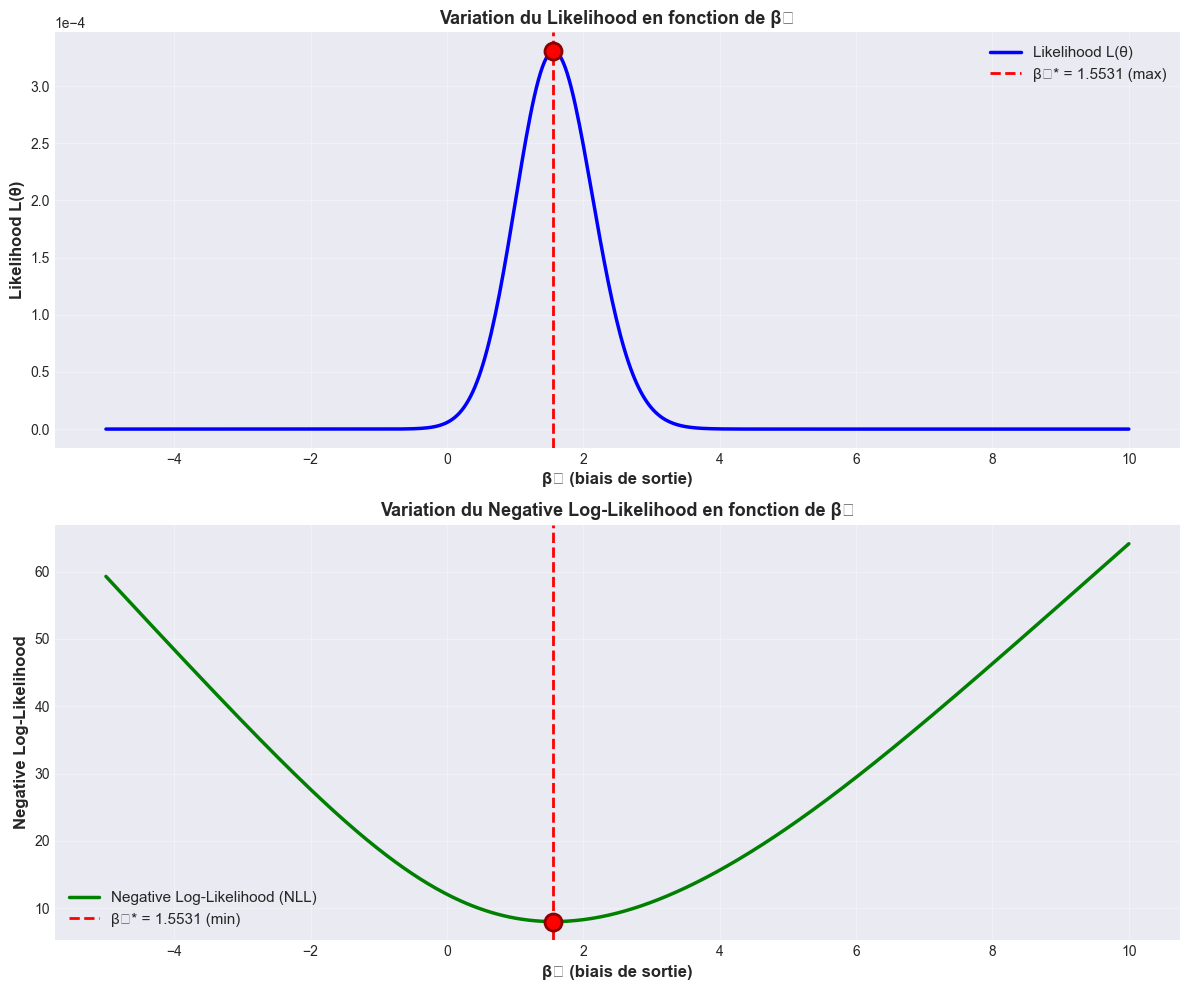

In [55]:
# Visualisation des graphes de variation

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Graphique 1: Likelihood en fonction de β₁
ax1.plot(beta1_range, likelihood_values, 'b-', linewidth=2.5, label='Likelihood L(θ)')
ax1.axvline(optimal_beta1_likelihood, color='r', linestyle='--', linewidth=2, 
            label=f'β₁* = {optimal_beta1_likelihood:.4f} (max)')
ax1.scatter([optimal_beta1_likelihood], [max_likelihood], color='r', s=150, 
            zorder=5, marker='o', edgecolors='darkred', linewidth=2)
ax1.set_xlabel('β₁ (biais de sortie)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Likelihood L(θ)', fontsize=12, fontweight='bold')
ax1.set_title('Variation du Likelihood en fonction de β₁', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Graphique 2: NLL en fonction de β₁
ax2.plot(beta1_range, nll_values, 'g-', linewidth=2.5, 
         label='Negative Log-Likelihood (NLL)')
ax2.axvline(optimal_beta1_nll, color='r', linestyle='--', linewidth=2, 
            label=f'β₁* = {optimal_beta1_nll:.4f} (min)')
ax2.scatter([optimal_beta1_nll], [min_nll], color='r', s=150, 
            zorder=5, marker='o', edgecolors='darkred', linewidth=2)
ax2.set_xlabel('β₁ (biais de sortie)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Negative Log-Likelihood', fontsize=12, fontweight='bold')
ax2.set_title('Variation du Negative Log-Likelihood en fonction de β₁', 
              fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [56]:
# Affichage des résultats de l'optimisation

print("\n" + "="*70)
print("QUESTION 4: RÉSULTATS DE L'OPTIMISATION")
print("="*70)

print("\n📊 Architecture du réseau:")
print("   Entrée (x) → [3 neurones ReLU] → Sortie linéaire (f(x))")
print("   f(x) = β₁ + Σⱼ Ω₁_j * ReLU(β₀_j + Ω₀_j * x)")

print("\n📌 Paramètres FIXES:")
print(f"   β₀ = {beta_0}")
print(f"   Ω₀ = {omega_0}")
print(f"   Ω₁ = {omega_1}")

print("\n🎯 Paramètre OPTIMISÉ: β₁ (biais de sortie)")

print("\n1. Valeur de β₁ qui donne le MAXIMUM du Likelihood:")
print(f"   β₁* = {optimal_beta1_likelihood:.6f}")
print(f"   L(θ*) = {max_likelihood:.15e}")

print("\n2. Valeur de β₁ qui donne le MINIMUM du Negative Log-Likelihood:")
print(f"   β₁* = {optimal_beta1_nll:.6f}")
print(f"   NLL(θ*) = {min_nll:.10f}")

print("\n3. Comparaison:")
difference = abs(optimal_beta1_likelihood - optimal_beta1_nll)
print(f"   Différence |β₁*(max L) - β₁*(min NLL)| = {difference:.10f}")

print("\n" + "="*70)
print("✅ CONCLUSION EMPIRIQUE:")
print("="*70)
print("✓ La vraisemblance est maximale pour β₁* ≈ {:.4f}".format(optimal_beta1_likelihood))
print("✓ Le NLL est minimal exactement au même point β₁* ≈ {:.4f}".format(optimal_beta1_nll))
print("\n💡 Ceci démontre empiriquement que:")
print("   max L(θ) ⟺ min NLL(θ) ⟺ min BCE(θ)")
print("\n📝 Tous les autres paramètres (β₀, Ω₀, Ω₁) étant fixés,")
print("   seul le BIAIS de sortie β₁ a été varié pour cette optimisation.")
print("="*70)


QUESTION 4: RÉSULTATS DE L'OPTIMISATION

📊 Architecture du réseau:
   Entrée (x) → [3 neurones ReLU] → Sortie linéaire (f(x))
   f(x) = β₁ + Σⱼ Ω₁_j * ReLU(β₀_j + Ω₀_j * x)

📌 Paramètres FIXES:
   β₀ = [ 0.3 -1.  -0.5]
   Ω₀ = [-1.    1.8   0.65]
   Ω₁ = [-24.  -8.  50.]

🎯 Paramètre OPTIMISÉ: β₁ (biais de sortie)

1. Valeur de β₁ qui donne le MAXIMUM du Likelihood:
   β₁* = 1.553106
   L(θ*) = 3.304932432148870e-04

2. Valeur de β₁ qui donne le MINIMUM du Negative Log-Likelihood:
   β₁* = 1.553106
   NLL(θ*) = 8.0149243430

3. Comparaison:
   Différence |β₁*(max L) - β₁*(min NLL)| = 0.0000000000

✅ CONCLUSION EMPIRIQUE:
✓ La vraisemblance est maximale pour β₁* ≈ 1.5531
✓ Le NLL est minimal exactement au même point β₁* ≈ 1.5531

💡 Ceci démontre empiriquement que:
   max L(θ) ⟺ min NLL(θ) ⟺ min BCE(θ)

📝 Tous les autres paramètres (β₀, Ω₀, Ω₁) étant fixés,
   seul le BIAIS de sortie β₁ a été varié pour cette optimisation.


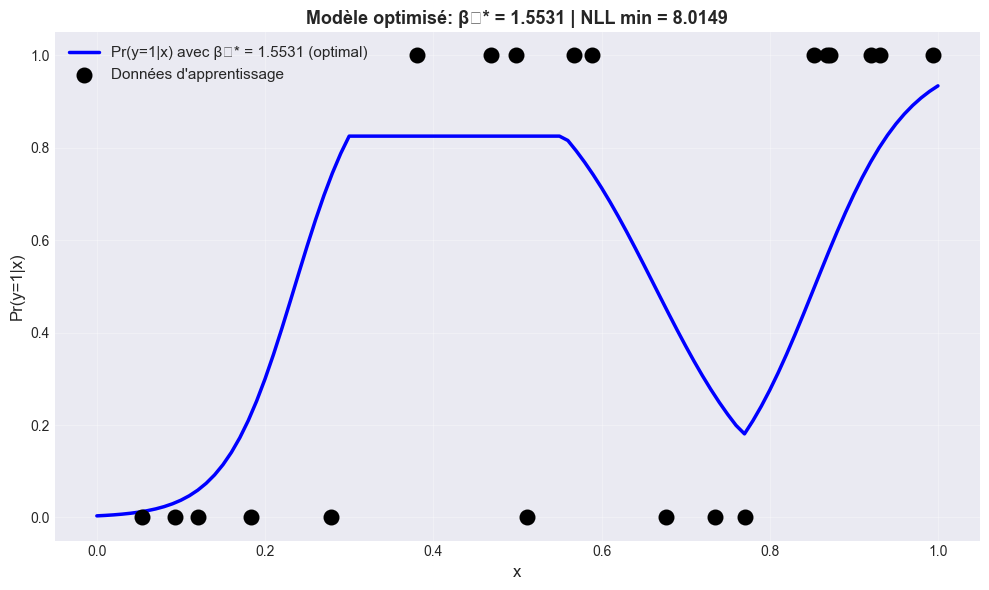


✅ Le réseau utilise bien:
   - 3 neurones cachés avec activation ReLU
   - 1 sortie linéaire: f(x) = β₁ + Ω₁ᵀ·h(x)
   - β₁ est le BIAIS de sortie (paramètre additif)


In [57]:
# Visualisation finale avec la valeur optimale de β₁

x_range = np.arange(0, 1.01, 0.01)
f_optimal = np.array([compute_network_output(x, optimal_beta1_nll) for x in x_range])
prob_optimal = sigmoid(f_optimal)

plt.figure(figsize=(10, 6))
plt.plot(x_range, prob_optimal, 'b-', linewidth=2.5, 
         label=f'Pr(y=1|x) avec β₁* = {optimal_beta1_nll:.4f} (optimal)')
plt.scatter(x_train, y_train, c='black', s=100, zorder=5, 
            edgecolors='black', linewidth=1.5,
            label='Données d\'apprentissage')
plt.xlabel('x', fontsize=12)
plt.ylabel('Pr(y=1|x)', fontsize=12)
plt.title(f'Modèle optimisé: β₁* = {optimal_beta1_nll:.4f} | NLL min = {min_nll:.4f}', 
          fontsize=13, fontweight='bold')
plt.ylim(-0.05, 1.05)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\n✅ Le réseau utilise bien:")
print(f"   - 3 neurones cachés avec activation ReLU")
print(f"   - 1 sortie linéaire: f(x) = β₁ + Ω₁ᵀ·h(x)")
print(f"   - β₁ est le BIAIS de sortie (paramètre additif)")